### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from matplotlib.pyplot import ylabel

warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [28]:
data = pd.read_csv('data/coupons.csv')

In [29]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [30]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [50]:
# Look at missing values
print("Missing values in data")
null_values = data.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values, "\n")

Missing values in data
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64 

794


In [55]:
# Looking into duplicated data
duplicates = data.duplicated()
print(duplicates.sum())

74


3. Decide what to do about your missing data -- drop, replace, other...

In [166]:
rows, columns = data.shape
print(f"% of rows with null 'car': {null_values['car']/rows:.2%}")
# Out of the total number of entries "car" is null in most of them. Choosing to drop that column since it won't have a significant impact
no_car_data = data.drop(columns=["car"])

print(f"% of remaining rows with any null value: {null_values[null_values.index != 'car'].sum()/rows:.2%}")
# Remaining rows with null values account for a small sample of the dataset, removing those rows as well
no_null_data = no_car_data.dropna()

# Also dropping duplcats
df = no_null_data.drop_duplicates()
df.head()

% of rows with null 'car': 99.15%
% of remaining rows with any null value: 6.26%


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [167]:
# The entries that accepted the coupon are the ones that marked Y=1
total_accepted_coupons = df["Y"].sum()
print(f"Proportion of accepted coupons: {total_accepted_coupons/rows:.2%}")

Proportion of accepted coupons: 53.81%


5. Use a bar plot to visualize the `coupon` column.

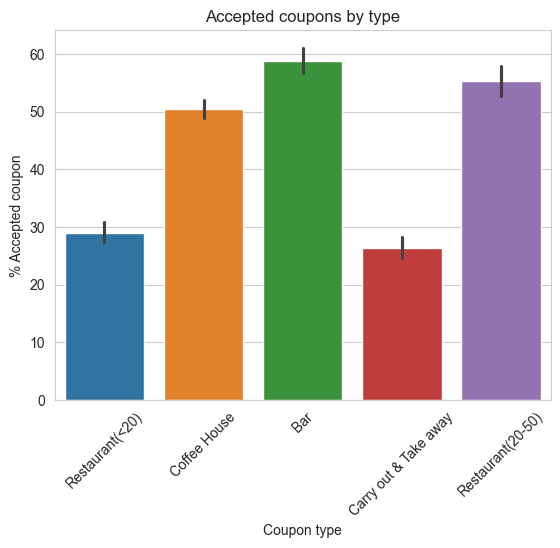

In [190]:
# Coupon accepted and coupon accepted by type
barplot = sns.barplot(x="coupon", y="Y", data=df, estimator=lambda x: sum(x==0)*100.0/len(x), hue="coupon")
barplot.set(ylabel="% Accepted coupon", xlabel="Coupon type", title="Accepted coupons by type")
barplot.tick_params(axis="x", rotation=45)

6. Use a histogram to visualize the temperature column.

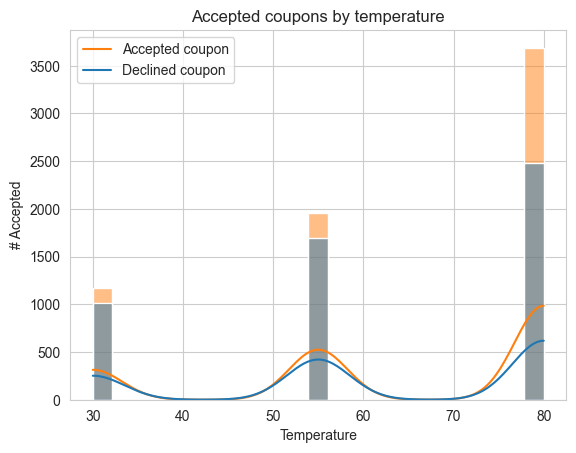

In [169]:
histplot = sns.histplot(data=df, x="temperature", hue="Y", kde=True)
histplot.set(xlabel="Temperature", ylabel="# Accepted", title="Accepted coupons by temperature")
plt.legend(labels=['Accepted coupon', 'Declined coupon'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [170]:
bar_df = df[df["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [171]:
total_bar_coupons, _ = bar_df.shape
proportion_accepted = bar_df["Y"].sum()/total_bar_coupons
print(f"Proportion of accepted Bar coupons: {proportion_accepted:.2%}")

Proportion of accepted Bar coupons: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


0.7616580310880829


[Text(0, 0.5, '% Accepted coupon'),
 Text(0.5, 0, 'Times visited bar'),
 Text(0.5, 1.0, 'Coupon acceptance rate by bar visit')]

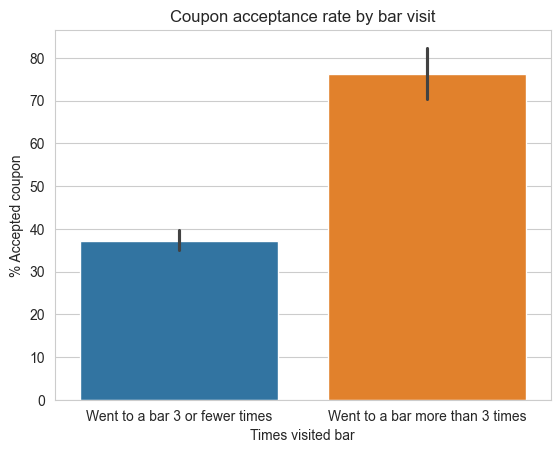

In [195]:
bar_df.loc[bar_df['Bar'].isin(['never', 'less1', '1~3']), 'bar_visit'] = "Went to a bar 3 or fewer times"
bar_df.loc[bar_df['Bar'].isin(['4~8', 'gt8']), 'bar_visit'] = "Went to a bar more than 3 times"

barplot = sns.barplot(x="bar_visit", y="Y", data=bar_df, estimator=lambda x: sum(x==1)*100.0/len(x), hue="bar_visit")
barplot.set(ylabel="% Accepted coupon", xlabel="Times visited bar", title="Coupon acceptance rate by bar visit")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


We can see that there is a small difference and although we the number of visits in this query has increased the age proves to be a balancing factor


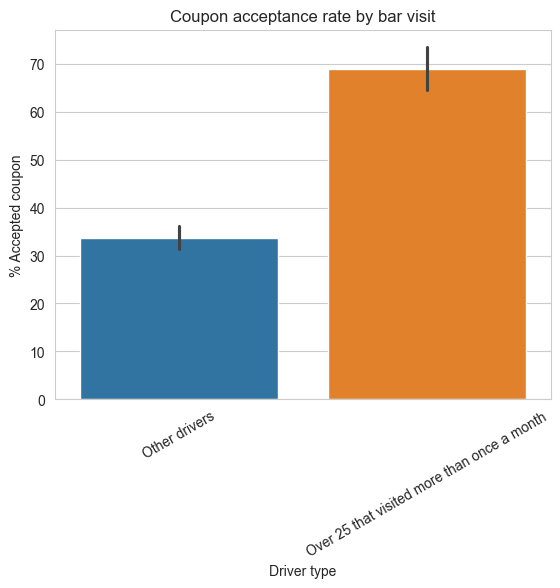

In [200]:
# print(bar_df['age'].value_counts())
query = bar_df['Bar'].isin(['1~3', '4~8', 'gt8']) & ~bar_df['age'].isin(['21', 'below21'])
# This query is easy to write because there is a small number of values in the 'age' columns. Were there more, it would be better to come up with a different strategy to use this column
bar_df.loc[query, 'bar_visit_2'] = "Over 25 that visited more than once a month"
bar_df.loc[~query, 'bar_visit_2'] = "Other drivers"

barplot = sns.barplot(x="bar_visit_2", y="Y", data=bar_df, estimator=lambda x: sum(x==1)*100.0/len(x), hue="bar_visit_2")
barplot.set(ylabel="% Accepted coupon", xlabel="Driver type", title="Coupon acceptance rate by bar visit")
barplot.tick_params(axis="x", rotation=30)

print(f"We can see that there is a small difference and although we the number of visits in this query has increased the age proves to be a balancing factor")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


[Text(0, 0.5, '% Accepted coupon'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Coupon acceptance rate by bar visit')]

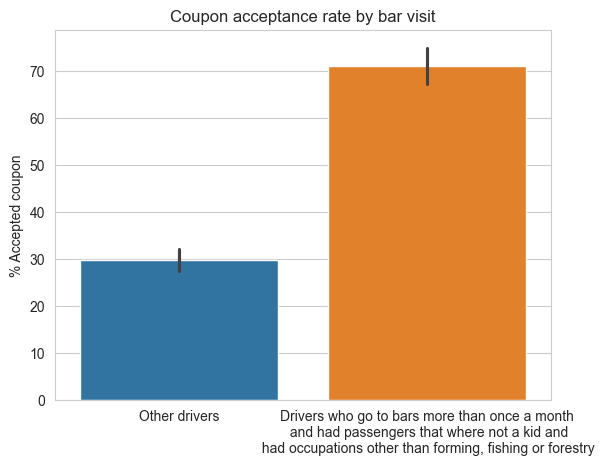

In [205]:
# Query: Drivers who go to bars more than once a month and had passengers that where not a kid and had occupations other than forming, fishing or forestry
query = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') & (~bar_df['occupation'].isin(['Farming Fishing & Forestry']))

bar_df.loc[query, 'query'] = "Drivers who go to bars more than once a month\n and had passengers that where not a kid and\n had occupations other than forming, fishing or forestry"
bar_df.loc[~query, 'query'] = "Other drivers"


barplot = sns.barplot(x="query", y="Y", data=bar_df, estimator=lambda x: sum(x==1)*100.0/len(x), hue="query")
barplot.set(ylabel="% Accepted coupon", xlabel="", title="Coupon acceptance rate by bar visit")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 70.94%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72.96%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.95%


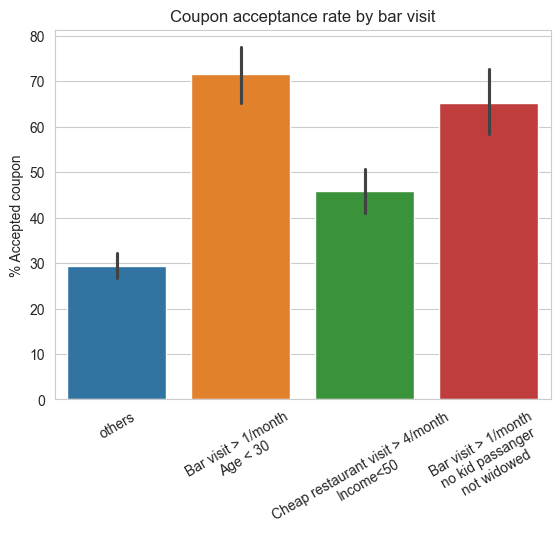

In [208]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
query_1 = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['passanger'] != 'Kid(s)') & (bar_df['maritalStatus'] != 'Widowed')

# go to bars more than once a month and are under the age of 30
query_2 = (bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'] < '30')

# go to cheap restaurants more than 4 times a month and income is less than 50K
query_3 =  (bar_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &  (bar_df['income'] < '$50000')

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {bar_df[query_1]['Y'].mean():.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {bar_df[query_2]['Y'].mean():.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {bar_df[query_3]['Y'].mean():.2%}")

bar_df.loc[query_1, 'query'] = "Bar visit > 1/month\nno kid passanger\nnot widowed"
bar_df.loc[query_2, 'query'] = "Bar visit > 1/month\nAge < 30"
bar_df.loc[query_3, 'query'] = "Cheap restaurant visit > 4/month\nIncome<50"
bar_df.loc[~query_1 & ~query_2 & ~query_3, 'query'] = "others"

barplot = sns.barplot(x="query", y="Y", data=bar_df, estimator=lambda x: sum(x==1)*100.0/len(x), hue="query")
barplot.set(ylabel="% Accepted coupon", xlabel="", title="Coupon acceptance rate by bar visit")
barplot.tick_params(axis="x", rotation=30)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

One relationship that we can infer by this data analysis is that people who visit bars frequently are more likely to accept coupons. At an average of ~70% more than non-frequent drivers.
Age also represents a important factor since drivers with less than 25 years are less than 30 are more likely to accept coupons.
The last analysis tells us that people who work in farming, fishing and forestry ar less likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  